# Preprocess for Sliders

In [51]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("~/Desktop/Thesis/InfoVis_Fall_2015_Survey.csv")
df = df.set_index('Name')
dataHD = df.copy()
for column in dataHD.columns:
    dataHD[column] = (dataHD[column]-dataHD[column].mean())/dataHD[column].std()

for elem in dataHD.columns:    
    exec("%s = (%d, %d)" % (elem, 0, 10))

In [52]:
Shoe

(0, 10)

In [54]:
dataHD.head()

,Age,Shoe,Siblings,SleepHours,Temperature,Pets,Extrovert,Cook,Spicey,Restaurants,...,PCvMac,CS,Books,DistanceBorn,Countries,States,PlacesLived,Camping,JobYears,Publications
Name,,,,,,,,,,,,,,,,,,,,,
Sangeetha,-0.404611,-1.530706,-0.261505,0.095682,0.293482,-0.502268,-0.187416,0.141207,0.893553,-0.897742,...,0.447088,0.903888,0.835355,0.989008,-0.352654,-0.828475,-0.594105,-0.381897,-0.443943,-0.271287
Gracie,-0.595356,-0.737303,0.601461,0.095682,-0.429272,1.593402,-1.917407,-0.226675,-1.042152,-1.023808,...,-0.184273,0.903888,2.071532,-1.177020,0.270788,0.240177,-0.594105,-0.331886,0.061234,-0.099124
Testing123,-0.213866,0.585034,-0.261505,-2.430316,0.438033,-2.178804,1.758824,-0.226675,0.409626,-0.771676,...,1.809500,0.378742,-0.153586,0.715399,-0.352654,-0.917529,-0.594105,-0.381897,-0.443943,-0.099124
Guangyue,0.549115,-0.208368,-1.124471,0.095682,0.510308,0.450309,-0.403665,-1.044190,-1.493817,0.615049,...,0.314170,-1.721843,-0.400821,0.564678,-0.352654,-0.116040,-0.594105,-0.465247,0.818999,-0.156512
Harsh,-0.786101,-0.472836,-0.261505,1.358681,0.654859,0.640825,1.110078,0.590841,1.054862,-1.023808,...,0.314170,-0.146404,-0.400821,1.855787,-0.768282,-0.917529,-0.932130,-0.465247,-0.949120,-0.213900


# MDS Function

In [55]:
import sklearn.metrics.pairwise
import sklearn.manifold

def cal_distance(dataHD):
    distHD = sklearn.metrics.pairwise.manhattan_distances(dataHD)
    distHD = pd.DataFrame(distHD, columns=dataHD.index, 
                          index=dataHD.index)
    # set up the parameters:
    mds = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed', n_init=100, max_iter=1000)

    # reduction algorithm happens here:
    data2D = mds.fit_transform(distHD)
    data2D = pd.DataFrame(data2D, columns=['x','y'], index=dataHD.index)
    return data2D

# Plot

In [56]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def plot(Age,Shoe,Siblings,SleepHours,Temperature,Pets,Extrovert,Cook,Spicey,Restaurants,SpendMoney,PhoneMinutes,PhoneApps,Photos,Facebook,PCvMac,CS,Books,DistanceBorn,Countries,States,PlacesLived,Camping,JobYears,Publications):
    weight_list = [Age,Shoe,Siblings,SleepHours,Temperature,Pets,Extrovert,Cook,Spicey,Restaurants,SpendMoney,PhoneMinutes,PhoneApps,Photos,Facebook,PCvMac,CS,Books,DistanceBorn,Countries,States,PlacesLived,Camping,JobYears,Publications]
    weight_list = [x/10 for x in weight_list]
    
    # apply weights to the data
    for i in range(len(dataHD.columns.tolist())):
        dataHD.iloc[:, i] = [x*weight_list[i] for x in dataHD.iloc[:, i]]
    
    # calculate distance and return points
    data2D = cal_distance(dataHD)

    # Data
    x = data2D['x']
    y = data2D['y']
    labels = data2D.index.values.tolist()
    
    # Create the figure and axes objects
    fig, ax = plt.subplots(1, figsize=(20, 15))
    fig.suptitle('Distribution of Students')
    ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

    # Add the participant names as text labels for each point
    for x_pos, y_pos, label in zip(x, y, labels):
        ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    # Show the plot
    plt.show()
    

interactive_plot = interactive(plot, Age=Age,Shoe=Shoe,Siblings=Siblings,SleepHours=SleepHours,Temperature=Temperature,
                               Pets=Pets,Extrovert=Extrovert,Cook=Cook,Spicey=Spicey,Restaurants=Restaurants,
                               SpendMoney=SpendMoney,PhoneMinutes=PhoneMinutes,PhoneApps=PhoneApps,Photos=Photos,
                               Facebook=Facebook,PCvMac=PCvMac,CS=CS,Books=Books,DistanceBorn=DistanceBorn,Countries=Countries,
                               States=States,PlacesLived=PlacesLived,Camping=Camping,JobYears=JobYears,Publications=Publications)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description='Age', max=10), IntSlider(value=5, description='Shoe', ma…

# Draggable Points Testing

<IPython.core.display.Javascript object>


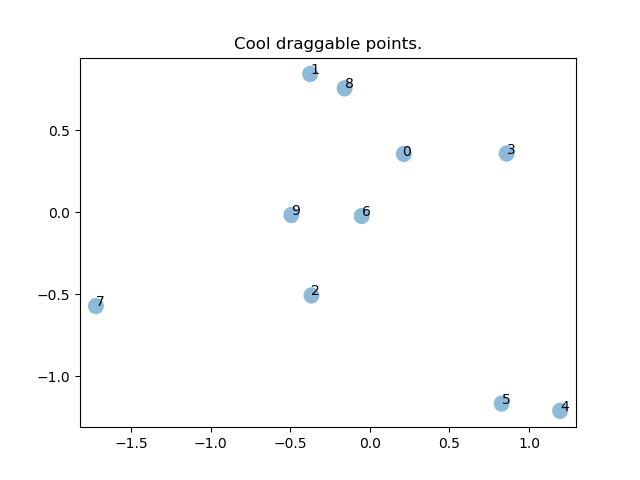

In [2]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  4 10:57:02 2017

@author: Nathan Wycoff
"""

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class DraggablePoints(object):
    def __init__(self, artists, tolerance=5):
        for artist in artists:
            artist.set_picker(tolerance)
        self.artists = artists
        self.currently_dragging = False
        self.current_artist = None
        self.offset = (0, 0)

        for canvas in set(artist.figure.canvas for artist in self.artists):
            canvas.mpl_connect('button_press_event', self.on_press)
            canvas.mpl_connect('button_release_event', self.on_release)
            canvas.mpl_connect('pick_event', self.on_pick)
            canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_press(self, event):
        self.currently_dragging = True

    def on_release(self, event):
        self.currently_dragging = False
        self.current_artist = None

    def on_pick(self, event):
        if self.current_artist is None:
            self.current_artist = event.artist
            x0, y0 = event.artist.center
            x1, y1 = event.mouseevent.xdata, event.mouseevent.ydata
            self.offset = (x0 - x1), (y0 - y1)

    def on_motion(self, event):
        if not self.currently_dragging:
            return
        if self.current_artist is None:
            return
        dx, dy = self.offset
        self.current_artist.center = event.xdata + dx, event.ydata + dy
        self.current_artist.figure.canvas.draw()

#Generate some data
n = 10
X = np.random.normal(size=[n, 2])



#Set up the axes
fig, ax = plt.subplots()
ax.set(xlim=[min(X[:,0]) - 0.1, max(X[:,0]) + 0.1], ylim=[min(X[:,1]) - 0.1, max(X[:,1]) + 0.1])

#Prep our circles
circles = [patches.Circle((xy[0], xy[1]), 0.05, alpha = 0.5) for i, xy in enumerate(X)]
for circ in circles:
    ax.add_patch(circ)
dr = DraggablePoints(circles)


plt.title("Cool draggable points.")

#This is where I number the circles.
for i in range(len(circles)):
    ax.annotate(str(i), [X[i,0], X[i,1]])

#Make the plot!
plt.show()

# Another Way to Make Interactive Plots /Still testing

In [7]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)